In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Create Some Data

In [5]:
np.random.seed(42)
x = np.random.random_sample(30)
y = 0.5 + x + np.random.normal(0, 0.1, len(x))

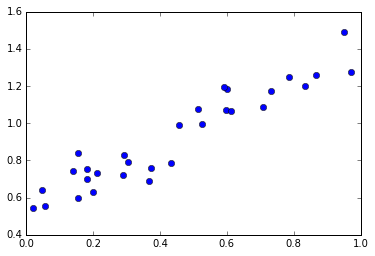

In [6]:
plt.plot(x, y, "o");

In [4]:
X = np.column_stack((np.ones(len(x)), x))

In [5]:
X

array([[ 1.        ,  0.37454012],
       [ 1.        ,  0.95071431],
       [ 1.        ,  0.73199394],
       [ 1.        ,  0.59865848],
       [ 1.        ,  0.15601864],
       [ 1.        ,  0.15599452],
       [ 1.        ,  0.05808361],
       [ 1.        ,  0.86617615],
       [ 1.        ,  0.60111501],
       [ 1.        ,  0.70807258]])

# Linear Regression

In [6]:
def gradient_descent(X, y, alpha=0.01, epochs=1000):
    """For a matrix x and vector y return a linear regression model."""
    theta = np.zeros(X.shape[1]).T
    for i in range(epochs):
        theta = theta - alpha * (X.dot(theta) - y).dot(X)
    return theta

In [7]:
theta = gradient_descent(X, y)

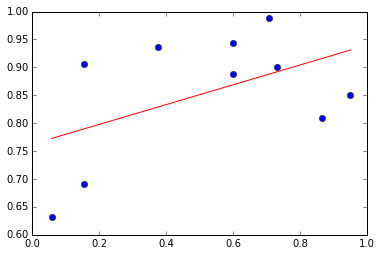

In [8]:
%matplotlib inline
mm = np.array([min(X[:, 1]), max(X[:, 1])])
Xmm = np.column_stack((np.ones(len(mm)), mm))
plt.plot(x, y, "o");
plt.plot(Xmm, Xmm.dot(theta));

In [9]:
%pylab osx
def traced_gradient_descent(X, y, alpha=0.01, epochs=1000):
    """For a matrix x and vector y return a linear regression model."""
    theta = np.zeros(X.shape[1]).T
    for i in range(epochs):
        theta = theta - alpha * (X.dot(theta) - y).dot(X)
        mm = np.array([min(X[:, 1]), max(X[:, 1])])
        Xmm = np.column_stack((np.ones(len(mm)), mm))
        plt.close()
        plt.plot(x, y, "o");
        plt.plot(xmm, Xmm.dot(theta))
        plt.savefig("tmp/%03d.png" % i)
    return theta
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


# Exact Solution

In [10]:
def analytical(X, y):
    return numpy.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))

# Polynomial Regression

In [11]:
def poly_expand(X, k=9):
    for _ in range(k-1):
        X = np.hstack((X, np.multiply(X[:, 1], X[:, -1]).reshape(len(X), 1)))
    return X

In [20]:
poly_degree = 6
Z = poly_expand(X, poly_degree)
theta = analytical(Z, y)

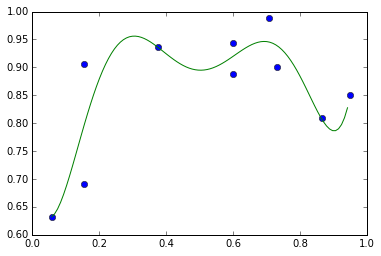

In [21]:
plt.plot(Z[:, 1], y, "o")
xmin, xmax = Z[:, 1].min(), Z[:, 1].max()
x_e = np.arange(xmin, xmax, (xmax-xmin)/100.)
x_e = np.vstack((np.ones(len(x_e)), x_e)).T
x_e = poly_expand(x_e, poly_degree)
plt.plot(x_e[:, 1], x_e.dot(theta));

In [14]:
theta

array([  8.16367802e+00,  -2.39058280e+02,   2.45538574e+03,
        -1.13030795e+04,   2.69855591e+04,  -3.48087313e+04,
         2.30411548e+04,  -6.14050687e+03])

# Regularization

In [15]:
def regularized(X, y, r=0.1):
    L = np.eye(X.shape[1]) * r
    L[0] = 0
    return numpy.linalg.pinv(X.T.dot(X) + L).dot(X.T.dot(y))

In [16]:
poly_degree = 9
Z = poly_expand(X, poly_degree)
theta = regularized(Z, y, r=0.01)
theta

array([ 0.66666565,  0.70289269, -0.1217962 , -0.28924435, -0.24671833,
       -0.15534204, -0.05860226,  0.03240896,  0.11507416,  0.18886789])

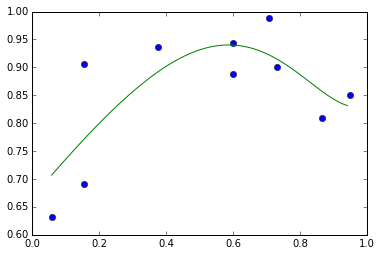

In [17]:
plt.plot(Z[:, 1], y, "o")
xmin, xmax = Z[:, 1].min(), Z[:, 1].max()
x_e = np.arange(xmin, xmax, (xmax-xmin)/100.)
x_e = np.vstack((np.ones(len(x_e)), x_e)).T
x_e = poly_expand(x_e, poly_degree)
plt.plot(x_e[:, 1], x_e.dot(theta));